In [1]:
import numpy as np
import jax
from jax.scipy import stats
import jax.numpy as jnp

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [238]:
samples = jnp.load('nealsfunnel_riaf_kld_elu_1.npz', allow_pickle=True)

In [239]:
ess = samples['ess_samples'].item()
atess = samples['atess_samples'].item()
atess_flow = samples['atess_flow_samples'].item()
nuts = samples['nuts_samples'].item()
neutra = samples['neutra_samples'].item()
neutra_flow = samples['neutra_flow_samples'].item()

In [224]:
def compare_plot_contour(logprob, ess, atess, nuts, neutra):
    np.random.seed(0)
    c, n = ess["x1"].shape
    x1 = np.random.normal(0., 1., size=c * n)
    x2 = np.random.normal(0., jnp.exp(2. * x1))
    
    fig, ax = plt.subplots(1, 4, figsize=(17, 3), sharex=True, sharey=True)
    ax[0].set_title("(T)ESS samples")
    ax[0].plot(x1, x2, '.', color='r', alpha=1.)
    ax[0].plot(ess["x1"].reshape(-1), ess["x2"].reshape(-1), '.', alpha=1)
    ax[1].set_title("ATESS samples")
    ax[1].plot(x1, x2, '.', color='r', alpha=1)
    ax[1].plot(atess["x1"].reshape(-1), atess["x2"].reshape(-1), '.', alpha=1)
    ax[2].set_title("NUTS samples")
    ax[2].plot(x1, x2, '.', color='r', alpha=1)
    ax[2].plot(nuts["x1"].reshape(-1), nuts["x2"].reshape(-1), '.', alpha=1)
    ax[3].set_title("NeuTra samples")
    ax[3].plot(x1, x2, '.', color='r', alpha=1)
    ax[3].plot(neutra["x1"].reshape(-1), neutra["x2"].reshape(-1), '.', alpha=1)

    ax[3].set_ylim(-100, 100)

In [230]:
def nealsfunnel(x1, x2):
    """Neal's Funnel density"""
    return stats.norm.logpdf(x1, 0.0, 1.) + stats.norm.logpdf(
        x2, 0., jnp.exp(2. * x1)
    )
nealsfunnel_fn = lambda x: nealsfunnel(**x)

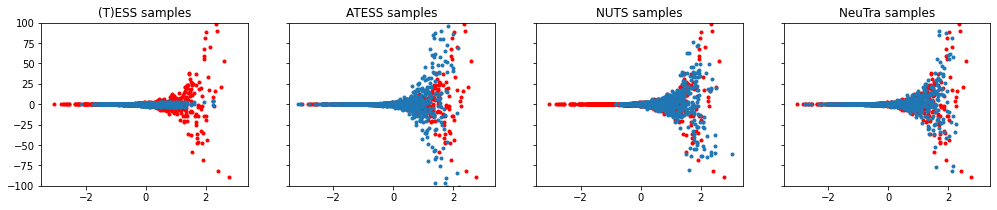

In [240]:
#epoch 0 with tol=0.01 neutra same as bottom two
compare_plot_contour(nealsfunnel_fn, ess, atess_flow, nuts, neutra_flow)

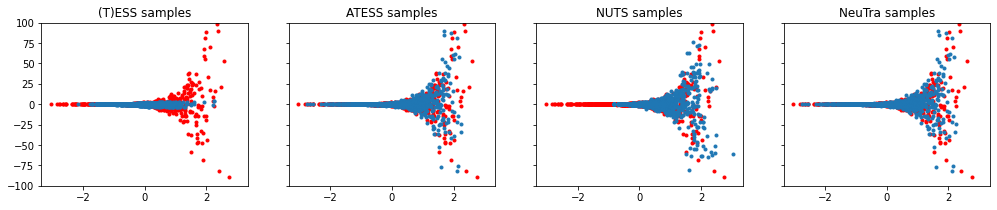

In [236]:
#epoch 0 with tol=0.01 neutra same as bottom two
compare_plot_contour(nealsfunnel_fn, ess, atess_flow, nuts, neutra_flow)

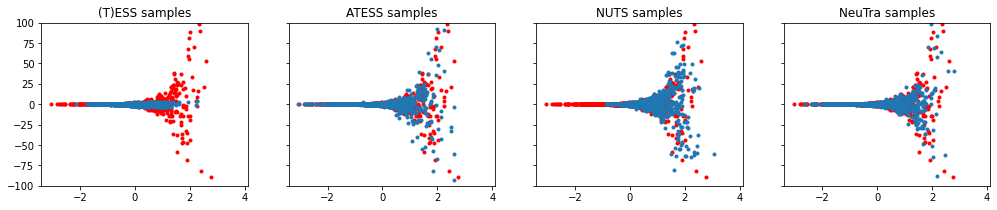

In [241]:
#epoch 0 with tol=0.01 neutra same as bottom two
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

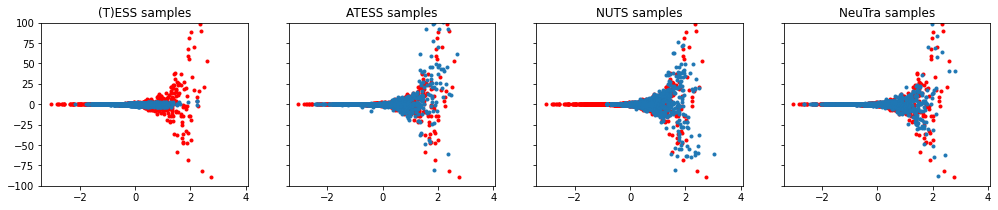

In [237]:
#epoch 0 with tol=0.01 neutra same as bottom two
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

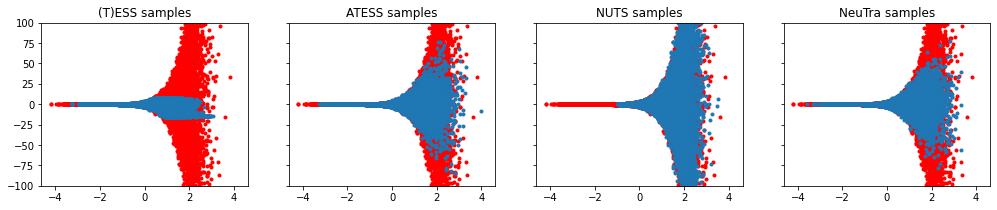

In [17]:
#epoch 0
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

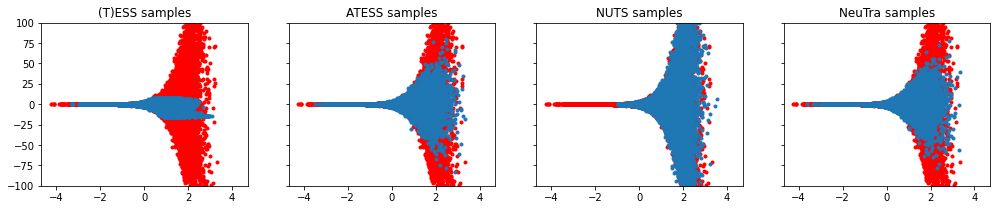

In [20]:
#epoch 1
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

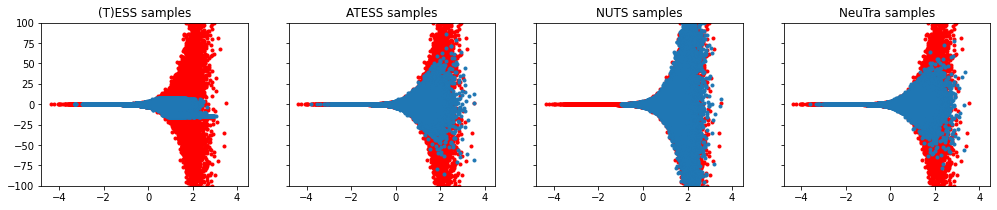

In [23]:
#epoch 2
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

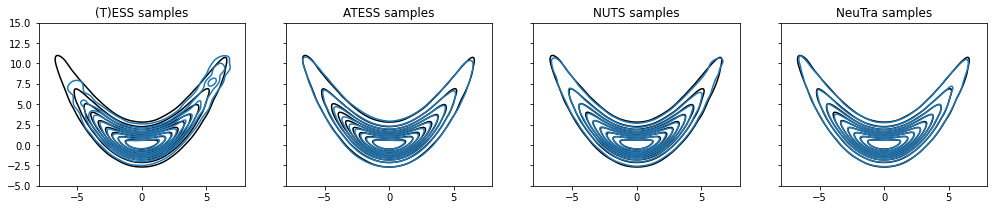

In [17]:
#epoch 3
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

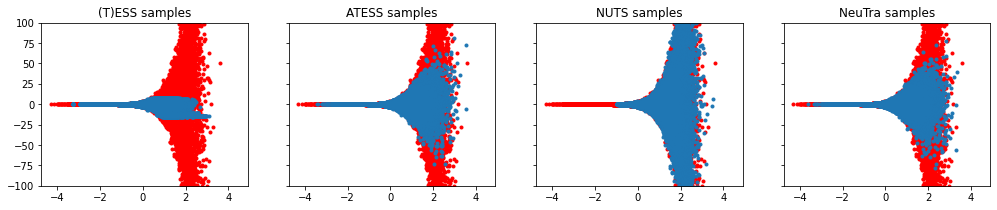

In [26]:
#epoch 4
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

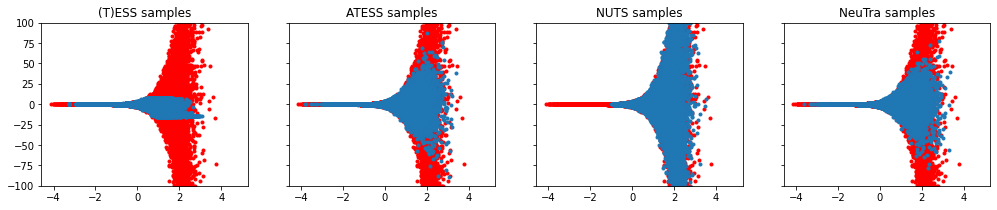

In [29]:
#epoch 4 with tol=0.01 w/ neutra only transformation
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

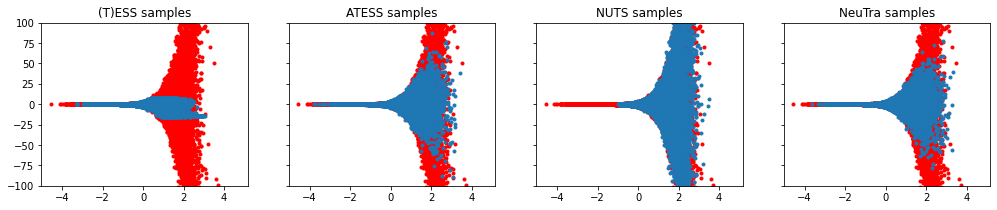

In [30]:
#epoch 5
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

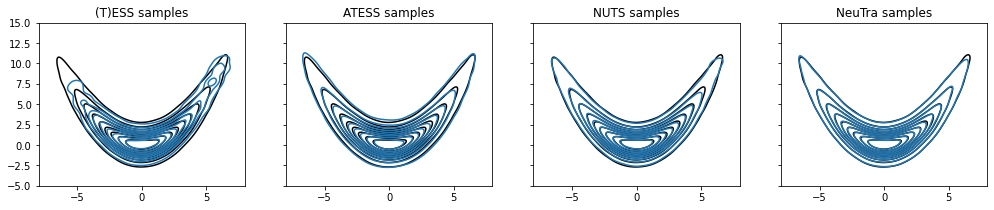

In [10]:
#epoch 6
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

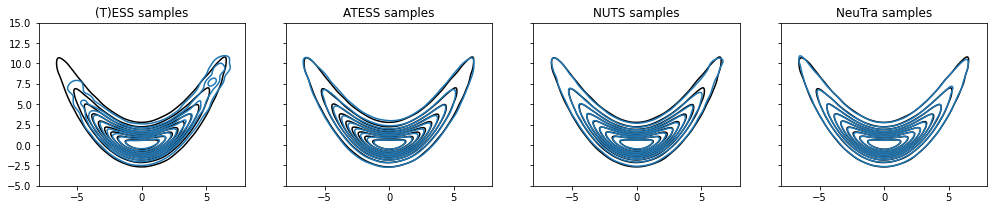

In [13]:
#epoch 7
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

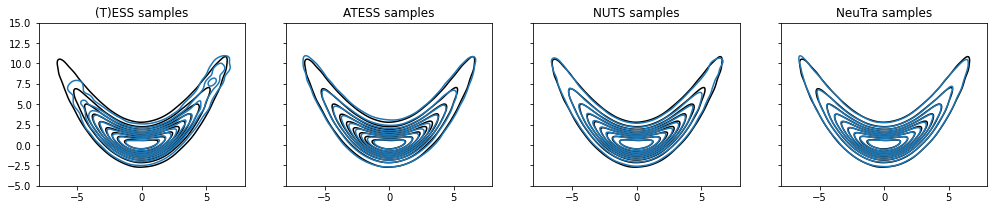

In [16]:
#epoch 8
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

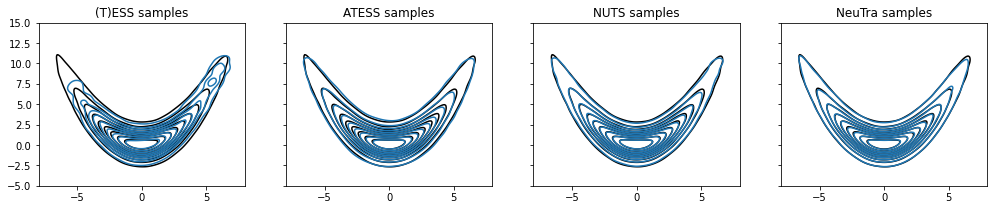

In [23]:
#epoch 9
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

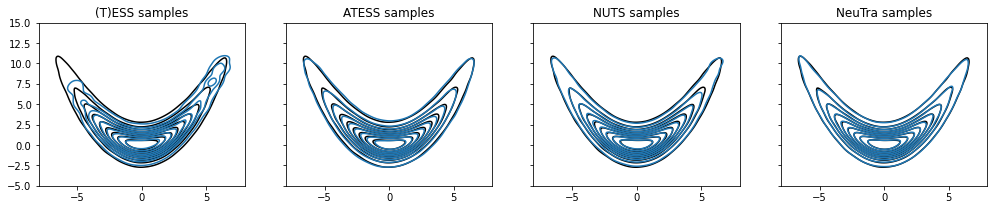

In [20]:
#epoch 10
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

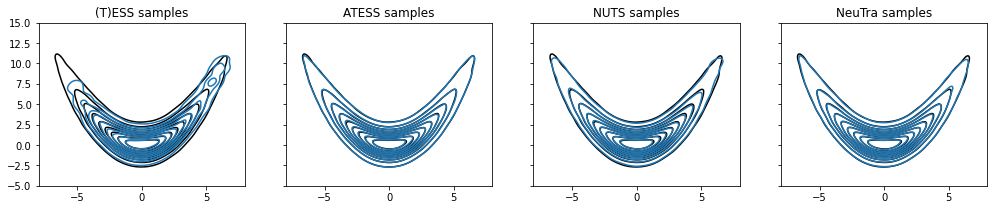

In [6]:
#samplers
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)

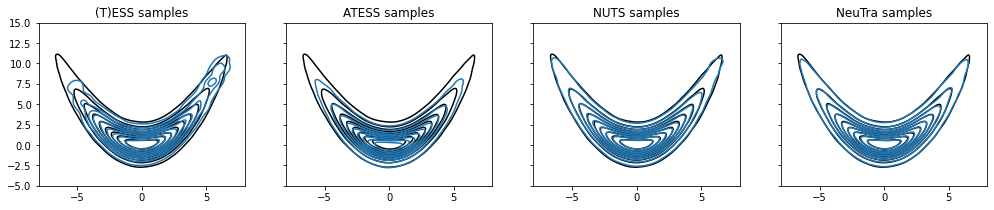

In [8]:
#prev_samplers
compare_plot_contour(nealsfunnel_fn, ess, atess, nuts, neutra)